# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

Files loaded
<class 'dict'>
train shape (39209, 32, 32, 3)
labels shape (39209,)
X_train shape (39209, 32, 32, 3)


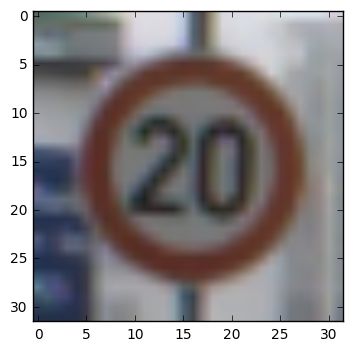

In [14]:
# Load pickled data
import pickle
import math
from mpl_toolkits.mplot3d import axes3d #Added
import matplotlib.pyplot as plt #Added
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec #Added
import csv #Added
import numpy as np #Added

from tqdm import tqdm #Added
import random #Added
import tensorflow as tf #Added
from PIL import Image #Added
from sklearn.model_selection import train_test_split #Added
from sklearn.preprocessing import LabelBinarizer #Added
from sklearn.utils import resample #Added

%matplotlib inline 


# TODO: fill this in based on where you saved the training and testing data
training_file ='train.p'
testing_file ='test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print("Files loaded")# Added
print(type(train))# Added
print ('train shape',train['features'].shape)# Added
print ('labels shape', train['labels'].shape)# Added

print ('X_train shape',X_train.shape)# Added

imgplot = plt.imshow(X_train[78])

#train_features, train_labels = uncompress_features_labels('notMNIST_train.zip')
#test_features, test_labels = uncompress_features_labels('notMNIST_test.zip')



In [15]:
### To start off let's do a basic data summary.

# TODO: number of training examples
#n_train = ...
n_train = len(X_train) #Added

# TODO: number of testing examples
#n_test = ...
n_test = len(X_test) #Added

# TODO: what's the shape of an image?
#image_shape = ...
image_shape = X_train.shape #Added

# TODO: how many classes are in the dataset
#n_classes = ...
n_classes = len(set(y_train)) #Added



print("Summary")# Added
print("Number of Training Examples: ",n_train)# Added
print('train_labels array shape', y_train.shape)
print("Number of Testing Examples: ",n_test)# Added
print("The Shape of an Image is: ",image_shape[1],"x",image_shape[2]," With ",image_shape[3]," Colors")# Added
print("Number of Classes: ",n_classes)# Added

print('train_labels array shape', y_train.shape)

Summary
Number of Training Examples:  39209
train_labels array shape (39209,)
Number of Testing Examples:  12630
The Shape of an Image is:  32 x 32  With  3  Colors
Number of Classes:  43
train_labels array shape (39209,)


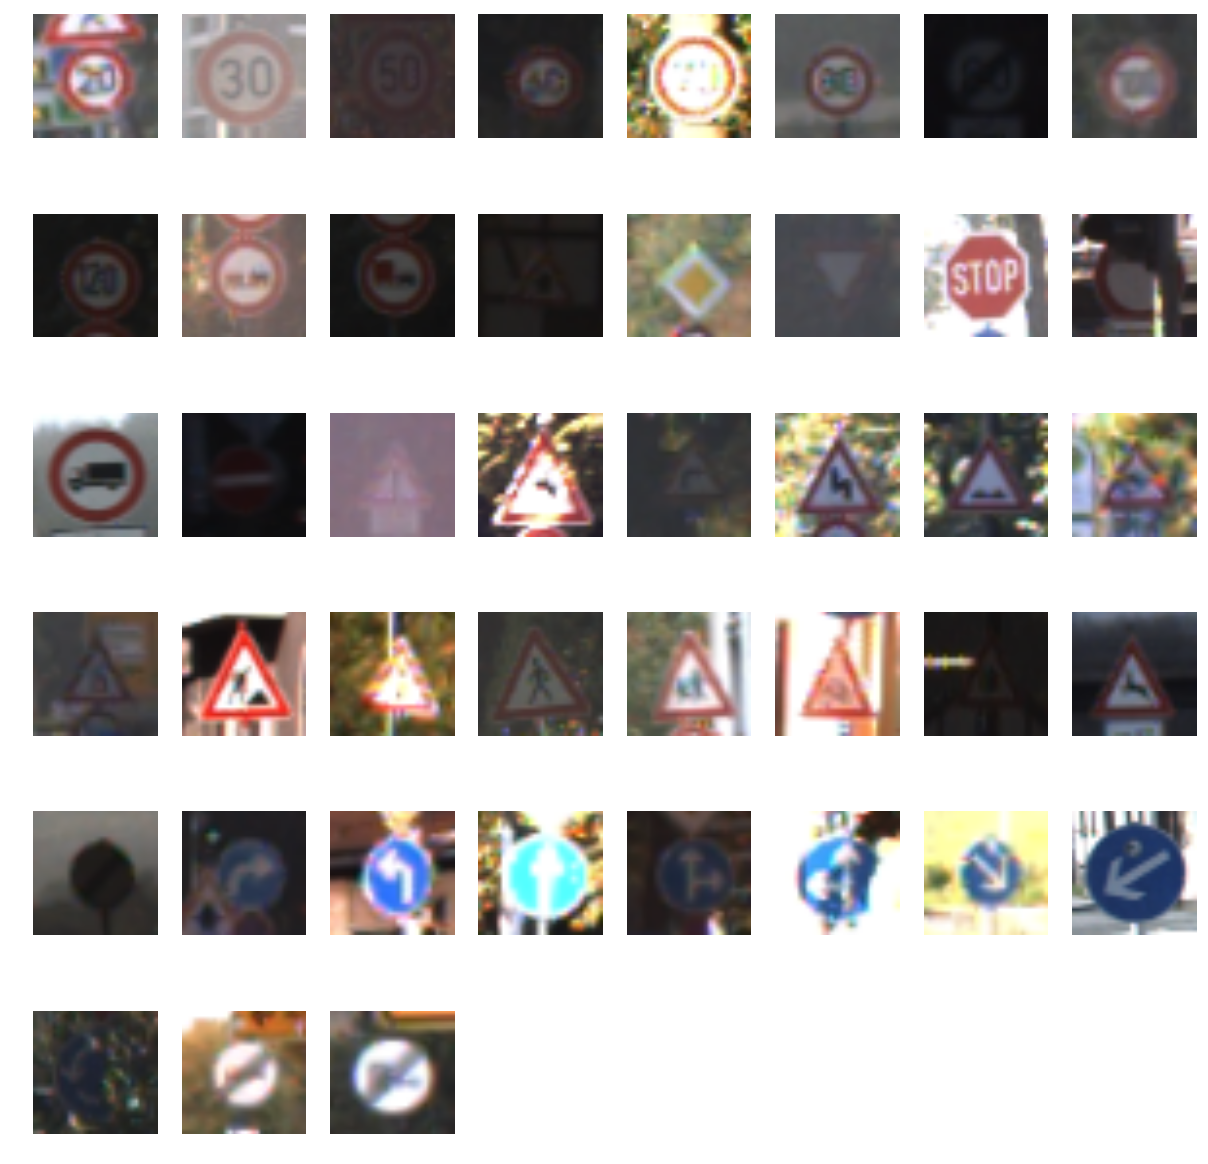

In [16]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


unique_labels, unique_labels_indices =  np.unique(y_train, return_index=True)

plt.figure(figsize=(15, 15))
i = 1

for label in unique_labels:
    # Pick the first image for each label.
    image = X_train[unique_labels_indices[label]]
    #print(unique_labels[label])
    plt.subplot(6, 8, i)  # A grid of 6 rows x 8 columns
    plt.axis('off')
    #plt.title("Label {0} ({1})".format(label, y_train.count(label)))
    #plt.title("Label {0} ({1})".format(label, y_train.count(label)))
    i += 1
    _ = plt.imshow(image)
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

X_trainGray array shape before change (39209, 32, 32)
X_testGray array shape before change (12630, 32, 32)
--------------------------------------------------
X_trainGray array shape after change (39209, 1024)
X_trainGray array shape after change (12630, 1024)
train_labels array shape (39209,)
Conversion Complete


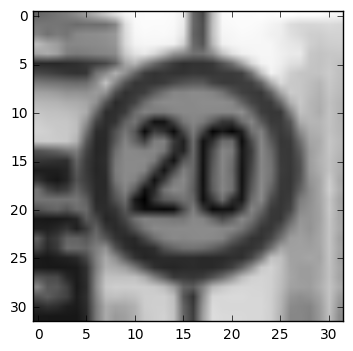

In [17]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
import numpy


# Initialize list
X_trainGray=[0 for i in range(len(X_train))]
X_testGray=[0 for i in range(len(X_test))]


# Convert to grayscale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

for i in range(len(X_train)):
    X_trainGray[i] = rgb2gray(X_train[i])

for j in range(len(X_test)):
    X_testGray[j] = rgb2gray(X_test[j]) 
    
    
# Convert list to Numpy array
X_trainGray = np.array(X_trainGray)
X_testGray = np.array(X_testGray)

print('X_trainGray array shape before change', X_trainGray.shape)
print('X_testGray array shape before change', X_testGray.shape)
print('--------------------------------------------------')

# Flatten and reshape array
X_trainGray = X_trainGray.flatten().reshape(39209, 1024)
print('X_trainGray array shape after change', X_trainGray.shape)
X_testGray = X_testGray.flatten().reshape(12630, 1024)
print('X_trainGray array shape after change', X_testGray.shape)
print('train_labels array shape', y_train.shape)

# Reshape and display sign
tempImage = X_trainGray.flatten().reshape(39209, 32, 32)
imgplot = plt.imshow(tempImage[78], cmap = 'Greys_r')


print('Conversion Complete')


X_trainGray array shape (39209, 1024)
train_labels array shape (39209,)
------------------------------
X_trainGray array shape (12630, 1024)
test_labels array shape (12630,)


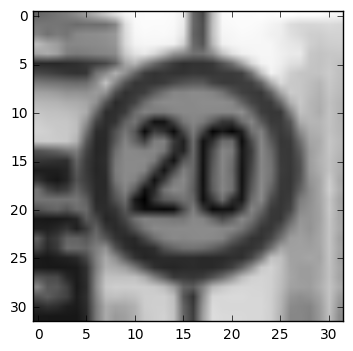

In [18]:
# Implement Min-Max scaling for greyscale image data
def normalize_greyscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # ToDo: Implement Min-Max scaling for greyscale image data

    a = 0.1
    b = 0.9
    greyscale_min = 0
    greyscale_max = 255
    # 0.1 + ( ((image_data-0)*(0.9-0.1)) / (255-0) )
    return a + ( ( (image_data - greyscale_min)*(b - a) )/( greyscale_max - greyscale_min ) )


X_trainGray = normalize_greyscale(X_trainGray)
X_testGray = normalize_greyscale(X_testGray)
print('X_trainGray array shape', X_trainGray.shape)
print('train_labels array shape', y_train.shape)
print('------------------------------')
print('X_trainGray array shape', X_testGray.shape)
print('test_labels array shape', y_test.shape)



# Reshape and display sign
tempImage = X_trainGray.flatten().reshape(39209, 32, 32)
imgplot = plt.imshow(tempImage[78], cmap = 'Greys_r')

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:** I used the Udacity dataset somost preprocessing is complete. Only converted to grayscale.

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.












In [19]:
# Turn labels into numbers and apply One-Hot Encoding
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


print('Labels One-Hot Encoded')

Labels One-Hot Encoded


In [20]:
# Get randomized datasets for training and validation
X_trainGray, valid_features, y_train, valid_labels = train_test_split(
    X_trainGray,
    y_train,
    test_size=0.05,
    random_state=832289)

print('Training features and labels randomized and split.')
print('Train features:', len(X_trainGray))
print('Test features:', len(X_testGray))
print('Vaidation features:', len(valid_features))
print('----------------------------------')
print('Train labels:', len(y_train))
print('Test labels:', len(y_test))
print('Vaidation labels:', len(valid_labels))


Training features and labels randomized and split.
Train features: 37248
Test features: 12630
Vaidation features: 1961
----------------------------------
Train labels: 37248
Test labels: 12630
Vaidation labels: 1961


In [21]:
print(X_trainGray.shape)

(37248, 1024)


In [22]:

features_count = 1024
labels_count = 43

# Set the features and labels tensors
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)

# Set the weights and biases tensors
weights = tf.Variable(tf.truncated_normal(([features_count, labels_count])))
#weights = tf.Variable(tf.truncated_normal((features_count, labels_count))) <-- No Braces []
biases = tf.Variable(tf.zeros(labels_count))





#Test Cases
from tensorflow.python.ops.variables import Variable

assert features._op.name.startswith('Placeholder'), 'features must be a placeholder'
assert labels._op.name.startswith('Placeholder'), 'labels must be a placeholder'
assert isinstance(weights, Variable), 'weights must be a TensorFlow variable'
assert isinstance(biases, Variable), 'biases must be a TensorFlow variable'

assert features._shape == None or (\
    features._shape.dims[0].value is None and\
    features._shape.dims[1].value in [None, 1024]), 'The shape of features is incorrect'
assert labels._shape in [None, 43], 'The shape of labels is incorrect'
assert weights._variable._shape == (1024, 43), 'The shape of weights is incorrect'
assert biases._variable._shape == (43), 'The shape of biases is incorrect'

assert features._dtype == tf.float32, 'features must be type float32'
assert labels._dtype == tf.float32, 'labels must be type float32'


# Feed dicts for training, validation, and test session
train_feed_dict = {features: X_trainGray, labels: y_train}
valid_feed_dict = {features: valid_features, labels: valid_labels}
test_feed_dict = {features: X_testGray, labels: y_test}

# Linear Function WX + b
# Linear classifier or Logistic classifier
# Takes input from X and applies a linear function to make predictions
# Formula = (Output: logits), W: weights, (Input X: features), b: biases
logits = tf.matmul(features, weights) + biases



prediction = tf.nn.softmax(logits)

# Cross entropy
cross_entropy = -tf.reduce_sum(labels * tf.log(prediction), reduction_indices=1)

# Training loss
loss = tf.reduce_mean(cross_entropy)

# Create an operation that initializes all variables
init = tf.initialize_all_variables()

# Test Cases
with tf.Session() as session:
    session.run(init)
    session.run(loss, feed_dict=train_feed_dict)
    session.run(loss, feed_dict=valid_feed_dict)
    session.run(loss, feed_dict=test_feed_dict)
    biases_data = session.run(biases)

assert not np.count_nonzero(biases_data), 'biases must be zeros'

print('Tests Passed!')

Tests Passed!


In [23]:
# Determine if the predictions are correct
is_correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(labels, 1))
# Calculate the accuracy of the predictions
accuracy = tf.reduce_mean(tf.cast(is_correct_prediction, tf.float32))

print('Accuracy function created.')

Accuracy function created.


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Epoch  8/8: 100%|██████████| 373/373 [00:04<00:00, 77.90batches/s]


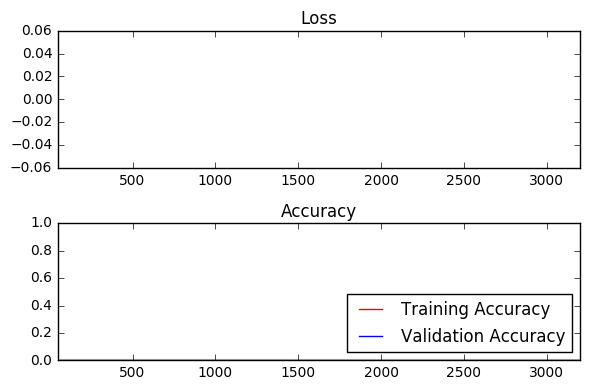

Validation accuracy at 0.00662927096709609


In [26]:
### Train your model here.
### Feel free to use as many code cells as needed.


epochs = 8
batch_size = 100
learning_rate = 0.1



### DON'T MODIFY ANYTHING BELOW ###
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)    

# The accuracy measured against the validation set
validation_accuracy = 0.0

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as session:
    session.run(init)
    batch_count = int(math.ceil(len(X_trainGray)/batch_size))

    for epoch_i in range(epochs):
        
        # Progress bar
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')
        
        # The training cycle
        for batch_i in batches_pbar:
            # Get a batch of training features and labels
            batch_start = batch_i*batch_size
            batch_features = X_trainGray[batch_start:batch_start + batch_size]
            batch_labels = y_train[batch_start:batch_start + batch_size]

            # Run optimizer and get loss
            _, l = session.run(
                [optimizer, loss],
                feed_dict={features: batch_features, labels: batch_labels})

            # Log every 50 batches
            if not batch_i % log_batch_step:
                # Calculate Training and Validation accuracy
                training_accuracy = session.run(accuracy, feed_dict=train_feed_dict)
                validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(l)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)

        # Check accuracy against Validation data
        validation_accuracy = session.run(accuracy, feed_dict=valid_feed_dict)

loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'b', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.